## HyPhy Example

Basic model explanation and data formatting

In [1]:
import os

#using GPU, comment out if on CPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'


In [2]:
from HyPhy import *

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Tensorflow Version:  1.11.0


Using TensorFlow backend.


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
# Loading example data...

sample_x = np.load("../example_data/samplesx.npy")
sample_y = np.load("../example_data/samplesy.npy")

In [5]:
sample_x.shape

(10, 5, 64, 64, 64)

### Conditioning Fields : Dark Matter Only Sim

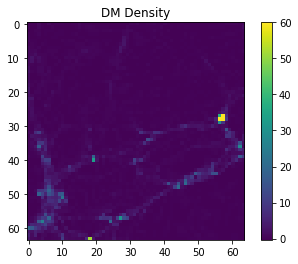

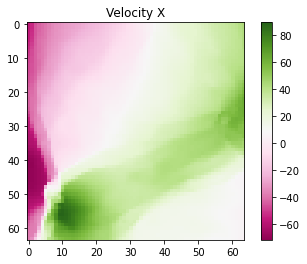

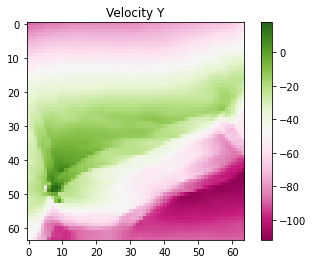

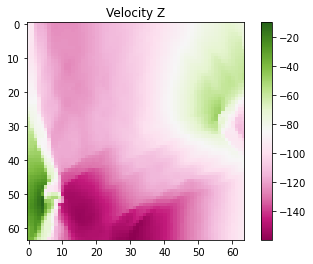

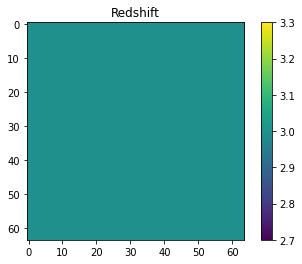

In [6]:
#196 different boxes, each having five files (density, vel_x,vel_y,vel_z,redshift)

imshow(sample_x[0,0,10],vmax=60)
title("DM Density")
colorbar()
show()

imshow(sample_x[0,1,10],cmap="PiYG")
title("Velocity X")
colorbar()
show()

imshow(sample_x[0,2,10],cmap="PiYG")
title("Velocity Y")
colorbar()
show()

imshow(sample_x[0,3,10],cmap="PiYG")
title("Velocity Z")
colorbar()
show()

imshow(sample_x[0,4,10])
title("Redshift")
colorbar()
show()

### Conditioning Fields : Corresponding Hydrodynamical Sim

In [7]:
sample_y.shape

(10, 5, 64, 64, 64)

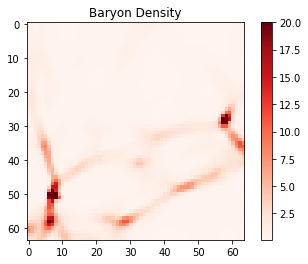

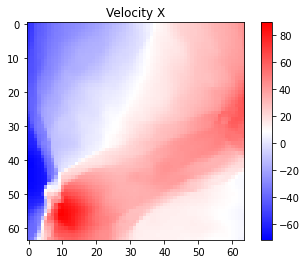

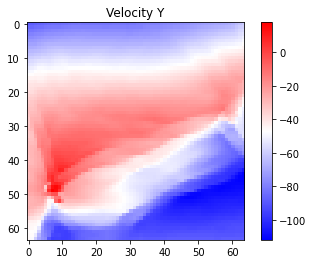

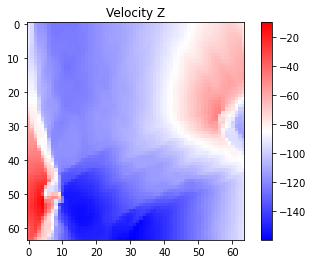

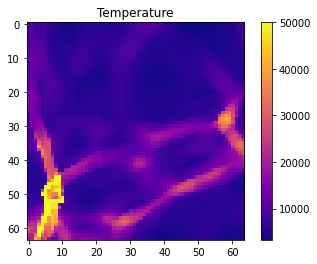

In [8]:
#196 different boxes, each having five files (density, vel_x,vel_y,vel_z,redshift)

imshow(sample_y[0,0,10],vmax=20, cmap="Reds")
title("Baryon Density")
colorbar()
show()

imshow(sample_y[0,1,10],cmap="bwr")
title("Velocity X")
colorbar()
show()

imshow(sample_y[0,2,10],cmap="bwr")
title("Velocity Y")
colorbar()
show()

imshow(sample_y[0,3,10],cmap="bwr")
title("Velocity Z")
colorbar()
show()

imshow(sample_y[0,4,10],vmax=50000,cmap="plasma")
title("Temperature")
colorbar()
show()

### Creating and loading weights into HyPhy Model

In [9]:
Hy = HyPhy()

In [10]:
Hy.cvae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
DM_field (InputLayer)           (None, 3, 64, 64, 64 0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 3, 64, 64, 64 0           DM_field[0][0]                   
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 4, 64, 64, 64 328         reshape_1[0][0]                  
__________________________________________________________________________________________________
tau_field (InputLayer)          (None, 3, 64, 64, 64 0                                            
__________________________________________________________________________________________________
conv3d_2 (

In [11]:
#loading saved weights from previous run
Hy.cvae.load_weights("../../HyPhy/model_z_LOS_logmap6n")

In [12]:
#initializing model generator, size1 and reduced_len sets the size of the input box
Hy.generator(size1=64,reduced_len=4)


In [13]:
#latent space sample
z_sample = np.array([np.random.randn(27)*1.00000])

#run generator/painter on sample dm field
x_decoded = Hy.gen.predict([sample_x[0,[0,1,-1]].reshape((1,3,64,64,64)),z_sample])


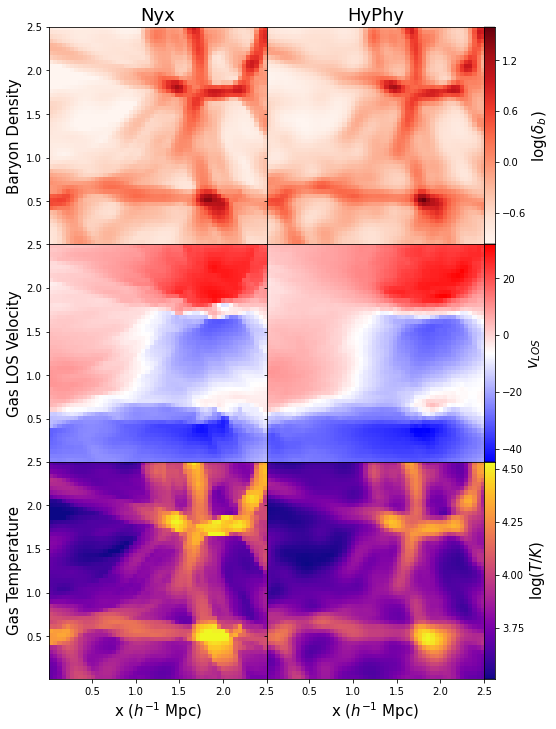

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.axes_grid1 import ImageGrid
extent = [0.01,2.5,0.01,2.5]
def six_panel(true,out,ss=0.,slic=32,chop=6):
    extent = [0.01,2.5,0.01,2.5]

    fig = plt.figure(figsize=(8.0,12.0))
    axs = ImageGrid(fig, 111,          # as in plt.subplot(111)
                    nrows_ncols=(3,2),
                    axes_pad=0.001, # might be able to make this a tuple to add space in one direction
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="5%",
                    cbar_pad=0.00, # I would usually pad it a bit but you had zero above
                    label_mode='L',
                    )
    ind = 0
    vmin = true[ind][chop:-1*chop,chop:-1*chop,slic].min()
    vmax = true[ind][chop:-1*chop,chop:-1*chop,slic].max()
    axs[0].imshow(ndimage.gaussian_filter(out[ind],ss)[chop:-1*chop,chop:-1*chop,slic],vmin=vmin,vmax=vmax,cmap="Reds",extent=extent)
    axs[0].set_title("Nyx",fontsize=18)
    axs[0].set_ylabel("Baryon Density",fontsize=15)
    a = axs[1].imshow(ndimage.gaussian_filter(true[ind],ss)[chop:-1*chop,chop:-1*chop,slic],vmin=vmin,vmax=vmax,cmap="Reds",extent=extent)
    cbar = axs[1].cax.colorbar(a)
    cbar.ax.set_ylabel("$\log(\delta_{b})$",fontsize=15)

    axs[1].set_title("HyPhy",fontsize=18)
    ind = 1
    vmin = 75*true[ind][chop:-1*chop,chop:-1*chop,slic].min()
    vmax = 75*true[ind][chop:-1*chop,chop:-1*chop,slic].max()
    axs[2].imshow(ndimage.gaussian_filter(75*out[ind],ss)[chop:-1*chop,chop:-1*chop,slic],vmin=vmin,vmax=vmax,cmap="bwr",extent=extent)
    axs[2].set_ylabel("Gas LOS Velocity",fontsize=15)
    b=axs[3].imshow(ndimage.gaussian_filter(75*true[ind],ss)[chop:-1*chop,chop:-1*chop,slic],vmin=vmin,vmax=vmax,cmap="bwr",extent=extent)
    cbar = axs[3].cax.colorbar(b)
    cbar.ax.set_ylabel('$v_{LOS}$',fontsize=15)
    ind=2
    vmin = true[ind][chop:-1*chop,chop:-1*chop,slic].min()
    vmax = true[ind][chop:-1*chop,chop:-1*chop,slic].max()
    axs[4].imshow(ndimage.gaussian_filter(out[ind],ss)[chop:-1*chop,chop:-1*chop,slic],vmin=vmin,vmax=vmax,cmap="plasma",extent=extent)
    axs[4].set_ylabel("Gas Temperature",fontsize=15)
    axs[4].set_xlabel("x ($h^{-1}$ Mpc)",fontsize=15)
    c = axs[5].imshow(ndimage.gaussian_filter(true[ind],ss)[chop:-1*chop,chop:-1*chop,slic],vmin=vmin,vmax=vmax,cmap="plasma",extent=extent)
    #axs[5].cax.colorbar(c)
    axs[5].set_xlabel("x ($h^{-1}$ Mpc)",fontsize=15)
    cbar = axs[5].cax.colorbar(c)
    cbar.ax.set_ylabel("$\log(T/K)$",fontsize=15)
    plt.savefig("6panel_noshock.pdf")
    plt.show()
    
import copy

y = copy.deepcopy(sample_y[0][[0,1,-1]])

#transform true NYX field to sampe space as used by HyPhy
y[0] = np.log10(y[0])
y[1] /= 100
y[2] = np.log10(y[2])


six_panel(x_decoded[0],y)



In [18]:
np.save("../example_data/samplesx",sample_x[0:2])
np.save("../example_data/samplesy",sample_y[0:2])